## csv파일에서 불러온 데이터셋 정리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def recode_p(popularity):   #popularity를 구간에 따라 나누기
    if popularity>=80:
        return 80
    elif popularity>=60:
        return 60
    elif popularity>=40:
        return 40
    elif popularity>=20:
        return 20
    else:
        return 0

df=pd.read_csv('../data/SpotifyFeatures.csv')

df=df.drop(['genre','artist_name','track_name','track_id','duration_ms',
           'instrumentalness','key','mode','tempo','time_signature'],axis=1)

check = ~df.isin([np.inf,-np.inf,np.nan]).any(1)
df = df[check]   #infinity, NaN 값이 없는 행만 가져와서 사용(이상한 값이 포함된 행 제거)

df['_popularity']=df['popularity'].apply(recode_p)

print(df)

        popularity  acousticness  danceability  energy  liveness  loudness  \
0                0       0.61100         0.389   0.910    0.3460    -1.828   
1                1       0.24600         0.590   0.737    0.1510    -5.559   
2                3       0.95200         0.663   0.131    0.1030   -13.879   
3                0       0.70300         0.240   0.326    0.0985   -12.178   
4                4       0.95000         0.331   0.225    0.2020   -21.150   
...            ...           ...           ...     ...       ...       ...   
232720          39       0.00384         0.687   0.714    0.0845   -10.626   
232721          38       0.03290         0.785   0.683    0.2370    -6.944   
232722          47       0.90100         0.517   0.419    0.0945    -8.282   
232723          44       0.26200         0.745   0.704    0.3330    -7.137   
232724          35       0.09730         0.758   0.470    0.0836    -6.708   

        speechiness  valence  _popularity  
0            0.0525

## 데이터별 히스토그램 그려서 분포 확인

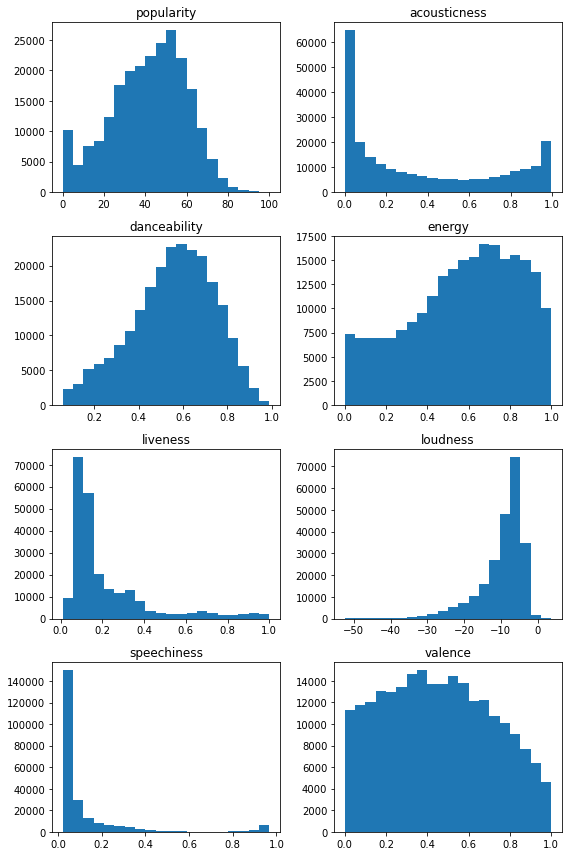

In [2]:
a=plt.figure(figsize=(8,12))
axes1=a.add_subplot(4,2,1)
axes2=a.add_subplot(4,2,2)
axes3=a.add_subplot(4,2,3)
axes4=a.add_subplot(4,2,4)
axes5=a.add_subplot(4,2,5)
axes6=a.add_subplot(4,2,6)
axes7=a.add_subplot(4,2,7)
axes8=a.add_subplot(4,2,8)

axes1.hist(df['popularity'],bins=20)
axes2.hist(df['acousticness'],bins=20)
axes3.hist(df['danceability'],bins=20)
axes4.hist(df['energy'],bins=20)
axes5.hist(df['liveness'],bins=20)
axes6.hist(df['loudness'],bins=20)
axes7.hist(df['speechiness'],bins=20)
axes8.hist(df['valence'],bins=20)

axes1.set_title('popularity')
axes2.set_title('acousticness')
axes3.set_title('danceability')
axes4.set_title('energy')
axes5.set_title('liveness')
axes6.set_title('loudness')
axes7.set_title('speechiness')
axes8.set_title('valence')

a.tight_layout()

## 데이터별 상관관계 찾기

In [3]:
df.corr(method="pearson")

,popularity,acousticness,danceability,energy,liveness,loudness,speechiness,valence,_popularity
popularity,1.000000,-0.381295,0.256564,0.248922,-0.167995,0.363011,-0.151076,0.060076,0.949448
acousticness,-0.381295,1.000000,-0.364546,-0.725576,0.069004,-0.690202,0.150935,-0.325798,-0.364712
danceability,0.256564,-0.364546,1.000000,0.325807,-0.041684,0.438668,0.134560,0.547154,0.257176
energy,0.248922,-0.725576,0.325807,1.000000,0.192801,0.816088,0.145120,0.436771,0.233345
liveness,-0.167995,0.069004,-0.041684,0.192801,1.000000,0.045686,0.510147,0.011804,-0.170969
loudness,0.363011,-0.690202,0.438668,0.816088,0.045686,1.000000,-0.002273,0.399901,0.351505
speechiness,-0.151076,0.150935,0.134560,0.145120,0.510147,-0.002273,1.000000,0.023842,-0.157558
valence,0.060076,-0.325798,0.547154,0.436771,0.011804,0.399901,0.023842,1.000000,0.067919
_popularity,0.949448,-0.364712,0.257176,0.233345,-0.170969,0.351505,-0.157558,0.067919,1.000000


## 수치가 높은 loudness와 energy 그래프 그리기

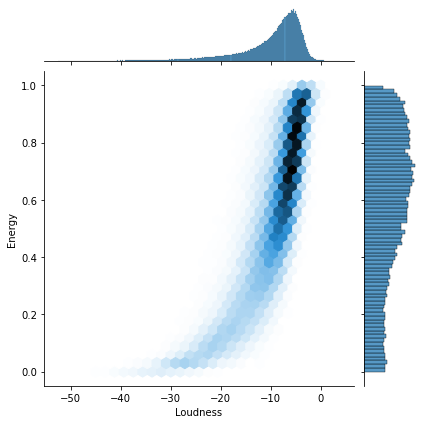

In [4]:
#data가 많으므로 hexbin으로 표현
k=sns.jointplot(x='loudness',y='energy',data=df,kind='hex',gridsize=30)
k.set_axis_labels(xlabel='Loudness',ylabel='Energy')

## _popularity를 기준으로 그룹화하여 평균 계산 및 그래프 그리기

In [5]:
music=df.groupby('_popularity')[['acousticness','danceability','energy','speechiness']].mean()
music

,acousticness,danceability,energy,speechiness
_popularity,,,,
0,0.667565,0.489997,0.423186,0.207848
20,0.425319,0.507406,0.550309,0.126794
40,0.284971,0.580661,0.606772,0.093640
60,0.228455,0.627953,0.640449,0.106957
80,0.206544,0.691990,0.645878,0.117527


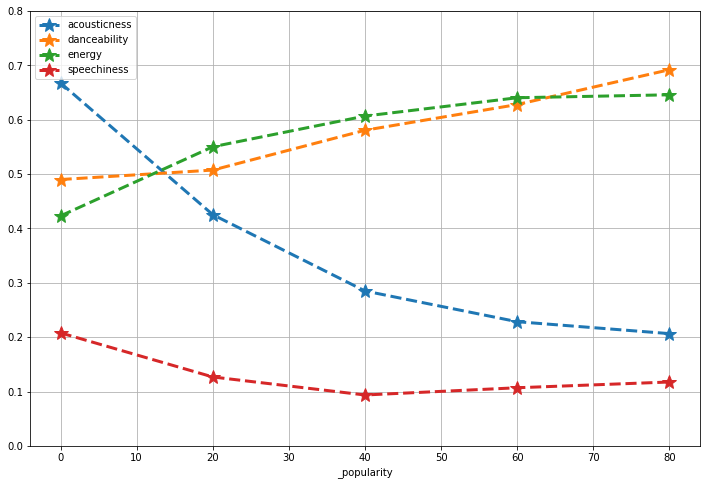

In [6]:
music.plot(figsize=(12,8),marker='*',ms=15,lw=3,ls='--',ylim=(0,0.8))
plt.grid(True)

## 각 요소별 popularity와의 관계 그래프 그리기

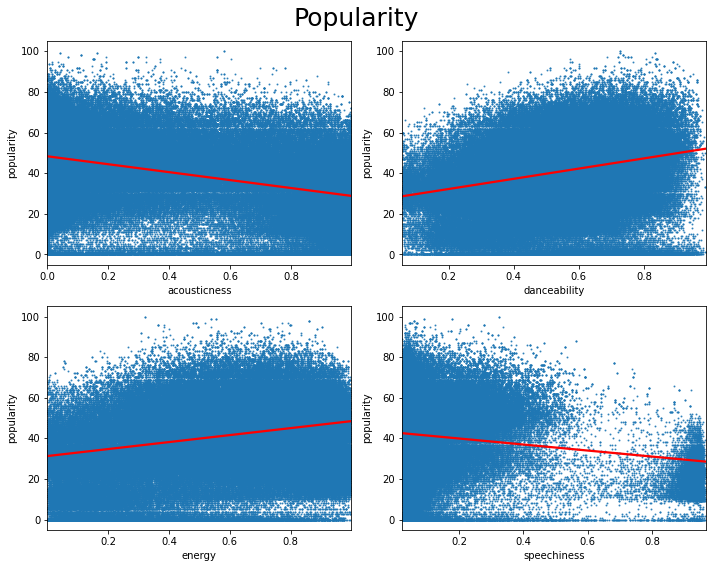

In [7]:
fig=plt.figure(figsize=(10,8))
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

sns.regplot(ax=axes1, x='acousticness',y='popularity',data=df, line_kws={"color" : "red"}, scatter_kws={"s":1})
sns.regplot(ax=axes2, x='danceability',y='popularity',data=df, line_kws={"color" : "red"}, scatter_kws={"s":1})
sns.regplot(ax=axes3, x='energy',y='popularity',data=df, line_kws={"color" : "red"}, scatter_kws={"s":1})
sns.regplot(ax=axes4, x='speechiness',y='popularity',data=df, line_kws={"color" : "red"}, scatter_kws={"s":1})

fig.suptitle('Popularity',fontsize=25)
fig.tight_layout()

## Ridge regression을 활용한 머신러닝

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_df=df.iloc[:200000,:]
X=np.array(train_df.iloc[:,[1,2,3,6]])
y=train_df['popularity']
print(train_df.shape)

test_df=df.iloc[200000:,:]
test_X=np.array(test_df.iloc[:,[1,2,3,6]])
test_y=test_df['popularity']
print(test_df.shape)

prev_best_r2=0.0
model_alpha=1.0
loss=0.0
for i in range(1,1300,1):
    Rr=Ridge(alpha=i)
    Rr.fit(X,y)
    
    pred_y=Rr.predict(test_X)
    
    train_loss=mean_squared_error(test_y,pred_y)
    
    r2=r2_score(test_y,pred_y)
    
    if r2>prev_best_r2:
        prev_best_r2=r2
        model_alpha=i
        loss=train_loss

print('new best/ alpha:',model_alpha,' r2:',prev_best_r2,' loss:',loss)

(200000, 9)
(32725, 9)
new best/ alpha: 1299  r2: 0.20818046596699247  loss: 152.8657693651204


array([-16.78257383,  13.45727376,  -0.95295996,  -8.11582077])

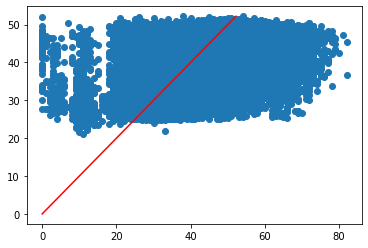

In [12]:
Rr=Ridge(alpha=1299)
Rr.fit(X,y)

pred_y=Rr.predict(test_X)
test_y=test_df['popularity']

plt.scatter(test_y,pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)],color='red')
Rr.coef_